# Een gedempte harmonische oscillator

In [92]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 12})

# Opzet scipy odeint solver
Deze functie kan alleen een (systeem van) eerste orde ODE's oplossen. Daarom schrijven we onze tweede ODE, de gedempte harmonische oscillator,

$m\ddot{x}+b\dot{x}+k\dot{x}=0$

als een systeem van twee eerste orde ODE's. Definieer
$\dot{x}:=v$
zodat 
$m\dot{v}+bv+kx=0$. Zo krijgen we een systeem van twee vergelijkingen

$\left\{ \begin{array}{ll}
 \dot{x}=v &\\
 \dot{v}=-\frac{bv}{m}-\frac{kx}{m}
\end{array} \right.$ 

welke we kunnen oplossen voor de twee onbekenden $x$ en $v$ met `odeint` van `scipy`.


Als randvoorwaarden kiezen we een arbitraire stroom $I_0:=I(t=0)$ en geven deze geen initiele snelheid $\dot{I}=0$ A/s. Dit is analoog aan het effect van een opgeladen condensator die het RLC ciruit sluit. De vraag blijft wel; wat is $I_0$ in de praktijk?

Text(0, 0.5, '$V(t)$ [mV]')

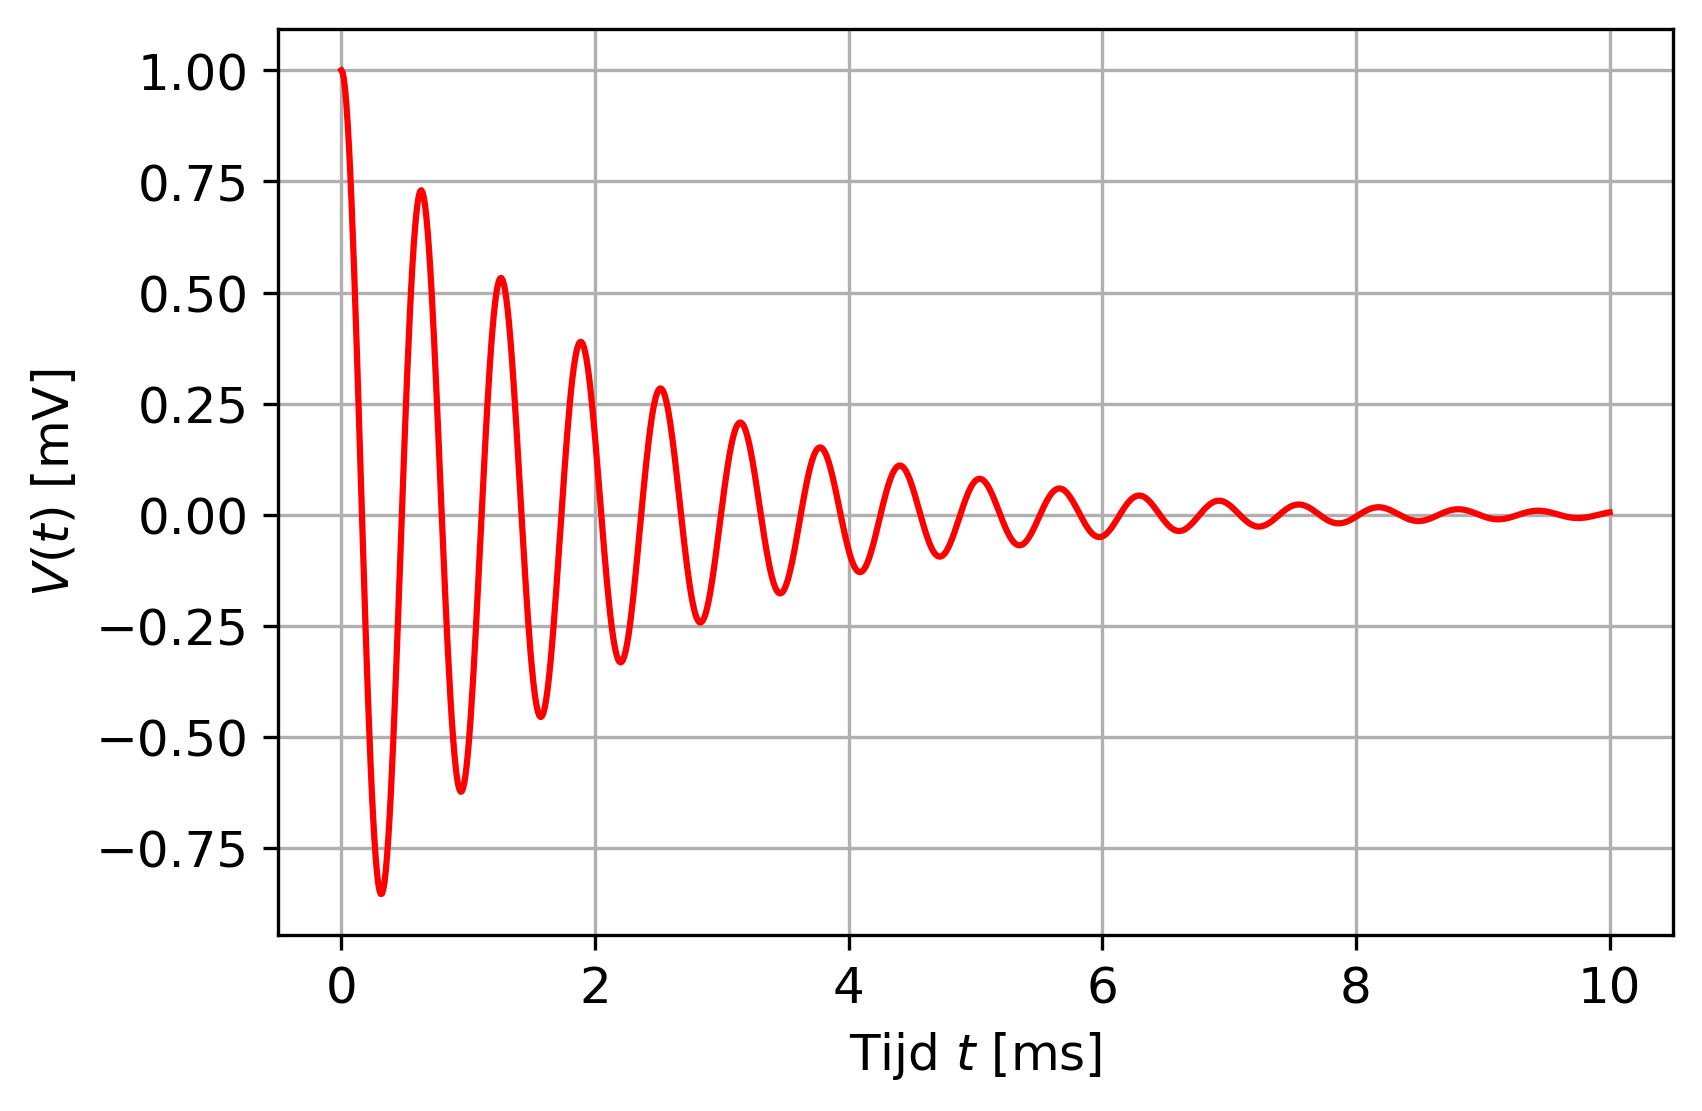

In [101]:
def dy(y, t, R, L, C):
    """
    RHS van bovenstaande vergelijkingen. y is een vector (x, p).
    """
    x, p = y[0] , y[1]
    dx = p
    dp = -(R/L)*p-(1/(C*L))*x
    return [dx,dp]

I0= 10e-3 # stroom I(t=0) in Ampere
y0 = [I0,0] # randvoorwaarden x(t=0), p(t=0)

t = np.linspace(0,10,int(1e3))*1e-3

R = 10 # Ohm
L = 10e-3 # Henry's
C = 1e-6 # Farad

sol = odeint(dy, y0, t, args=(R, L, C)) # solution

plt.figure(dpi=300)
plt.plot(t*1e3, sol[:,0]*1e3/R, 'r') # sol[:,0] is de stroom I(t)
plt.grid()
plt.xlabel(r"Tijd $t$ [ms]")
plt.ylabel(r"$V(t)$ [mV]")